# HEART ATTACK ANALYSIS AND PREDICTION
![](https://source.wustl.edu/wp-content/uploads/2019/02/HeartImage-760x594.jpg)

# About this dataset¶
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
dataset = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
data = dataset.copy()

In [5]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# check weather null values are there
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
# Seperating Numerical, Discreate ,continous and categorical variables

data_numerical = [feature for feature in data.columns if data[feature].dtype != 'O']
data[data_numerical].head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Discrete Variables
data_discreate = [feature for feature in data_numerical if len(data[feature].unique())<25]
data[data_discreate].head()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [12]:
feature_discrete = [data[feature].value_counts() for feature in data_discreate]
feature_discrete

[1    207
 0     96
 Name: sex, dtype: int64,
 0    143
 2     87
 1     50
 3     23
 Name: cp, dtype: int64,
 0    258
 1     45
 Name: fbs, dtype: int64,
 1    152
 0    147
 2      4
 Name: restecg, dtype: int64,
 0    204
 1     99
 Name: exng, dtype: int64,
 2    142
 1    140
 0     21
 Name: slp, dtype: int64,
 0    175
 1     65
 2     38
 3     20
 4      5
 Name: caa, dtype: int64,
 2    166
 3    117
 1     18
 0      2
 Name: thall, dtype: int64,
 1    165
 0    138
 Name: output, dtype: int64]

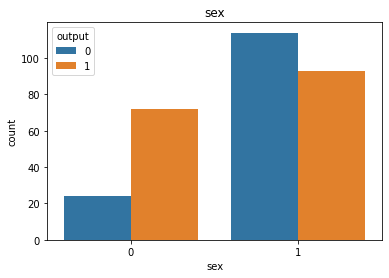

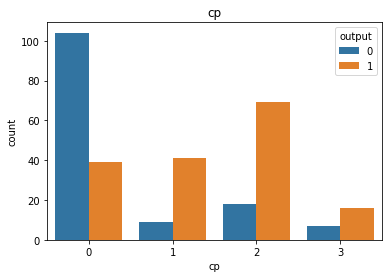

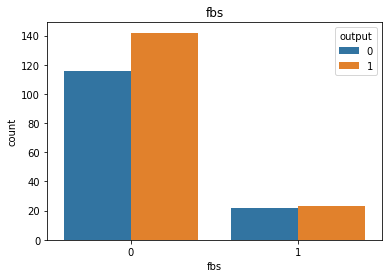

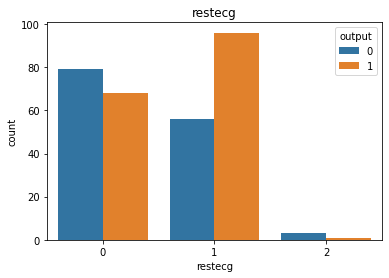

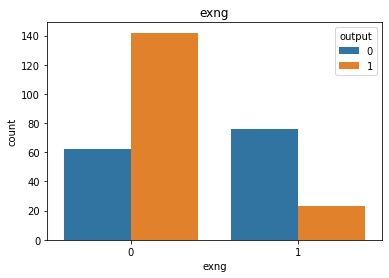

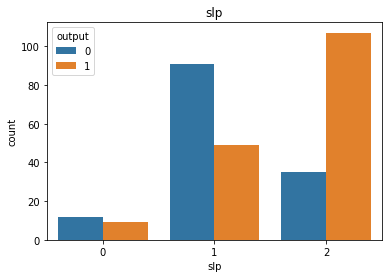

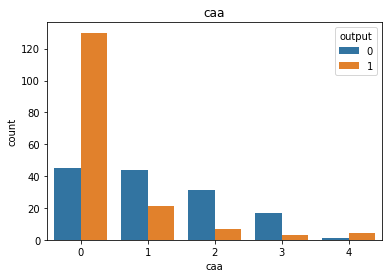

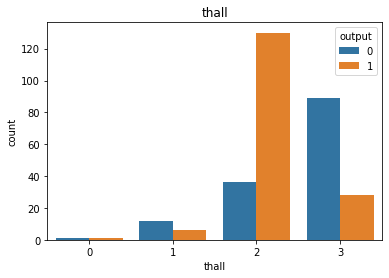

In [13]:
# Now Visualize the relationship between each feature_discrete and output
for feature in data_discreate[:-1]:

    sns.countplot(data=data,x=data[feature],hue='output')
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

# # Observation
1. As per the sex we can observe that compare to females the males are mostly affecting by Heart attack.
2. Those who are having non-anginal Chest pain are mostly affecting by heart attack compare to atypical angina & typical angina and those who are suffering with asymptomatic are having less chances of heart attack
3. fbs People belong to category 0 has more chance of heart attack where 1 has less chance of heart     attack
4. People having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   are highy affecting by heart attack followed by normal people



In [14]:
# Categorical variables
data_categorical = [feature for feature in data.columns if data[feature].dtype == 'O']
data_categorical
# we dont have any categorical variables in dataset

[]

In [15]:
# Continous Variables
data_continous = [feature for feature in data_numerical if feature not in data_discreate]
data[data_continous].head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


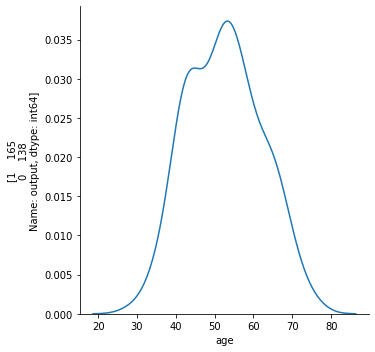

In [16]:
sns.displot(data[data['output']==1].age, kind='kde')
plt.ylabel([data['output'].value_counts()])
plt.show()

Note : From the above graph we can observe that the age between 50 to 65 has high chances of getting heart attack

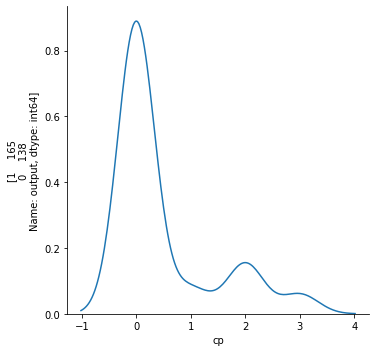

In [17]:
sns.displot(data[data['output']==0].cp, kind='kde')
plt.ylabel([data['output'].value_counts()])
plt.show()

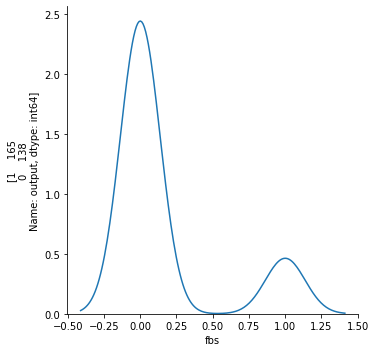

In [18]:
sns.displot(data[data['output']==0].fbs, kind='kde')
plt.ylabel([data['output'].value_counts()])
plt.show()

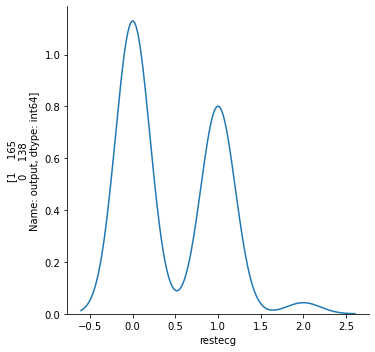

In [19]:
sns.displot(data[data['output']==0].restecg, kind='kde')
plt.ylabel([data['output'].value_counts()])
plt.show()

### Let's see Data is normally distributed or not

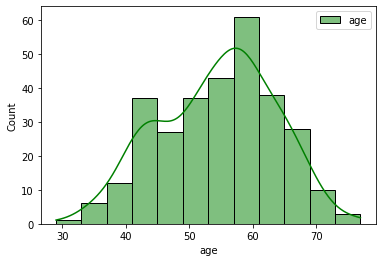

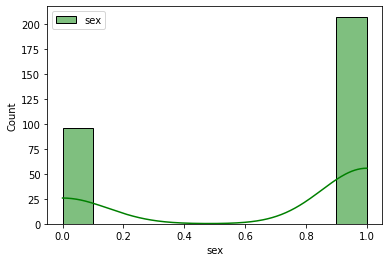

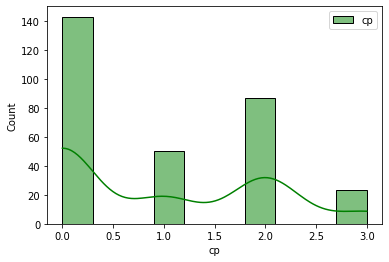

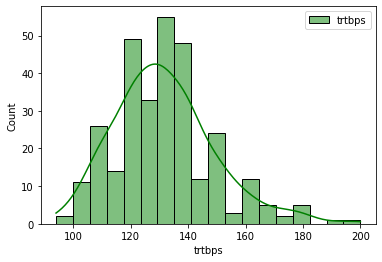

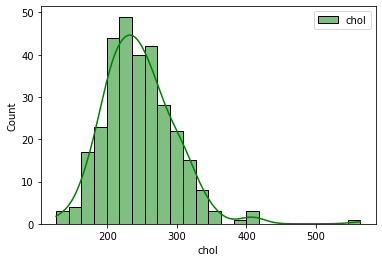

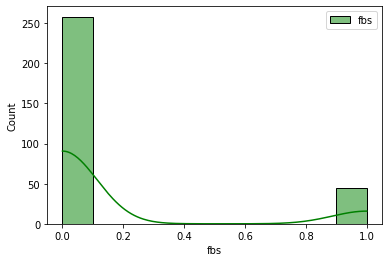

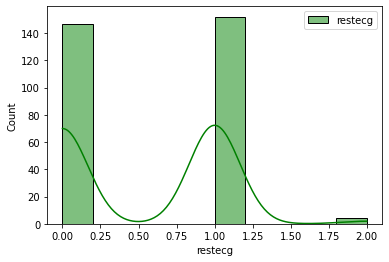

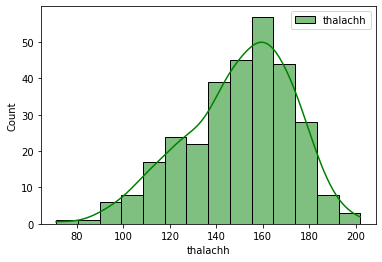

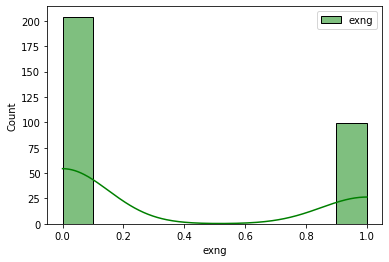

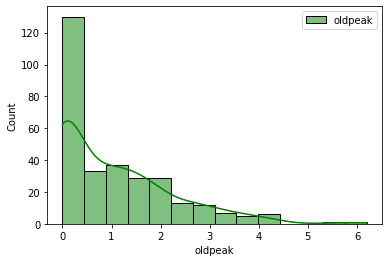

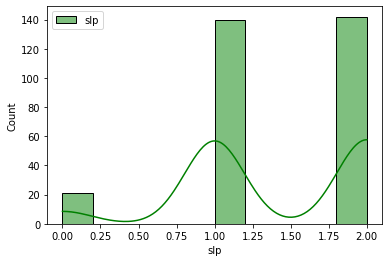

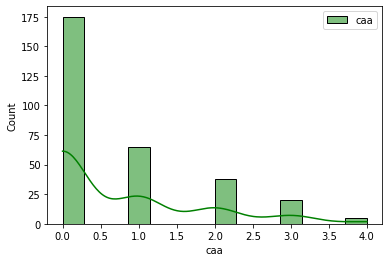

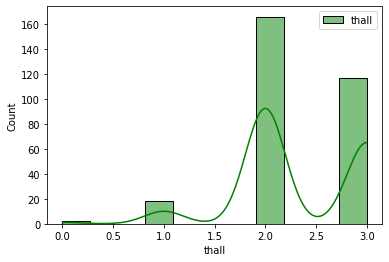

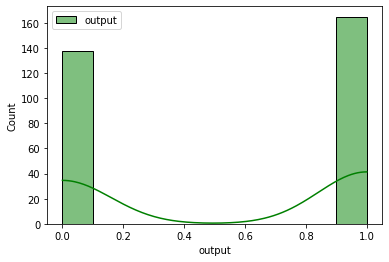

In [20]:
for feature  in data:
    sns.histplot(data=data,x= data[feature],kde=True,label=feature,color='green')
    sns.color_palette("pastel")
    plt.xlabel(feature)
    plt.legend()
    plt.show()

####  Let's find the Outliers

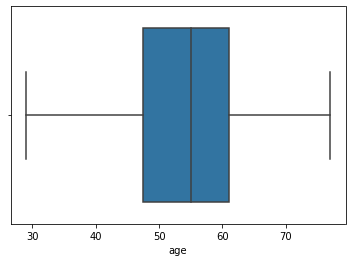

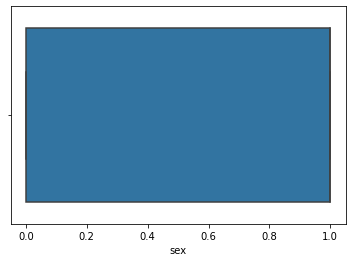

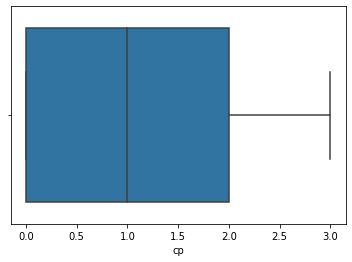

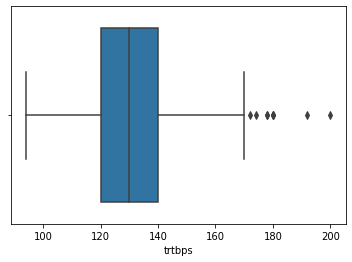

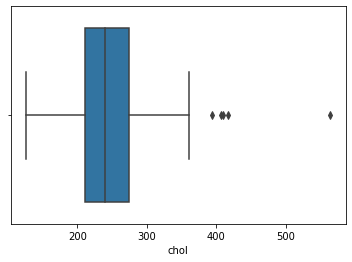

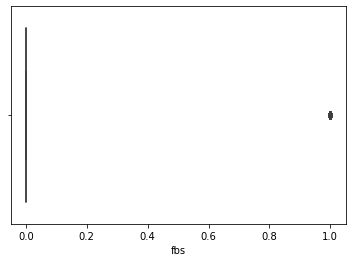

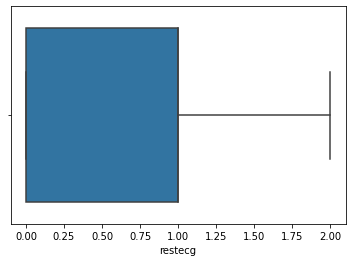

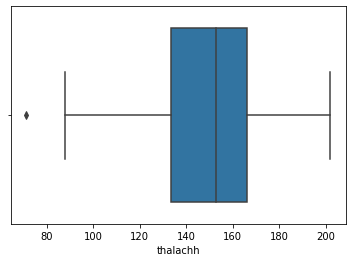

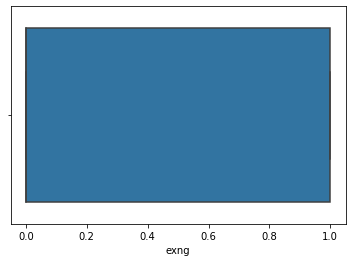

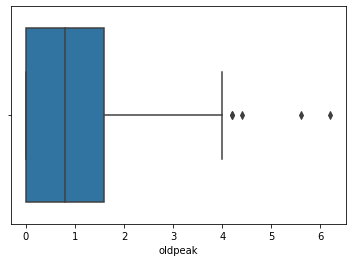

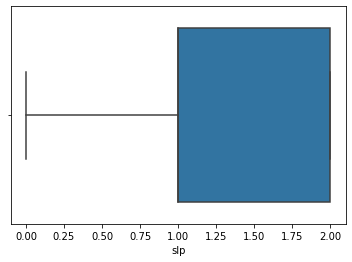

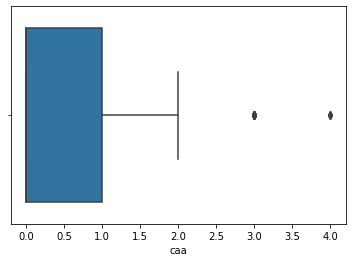

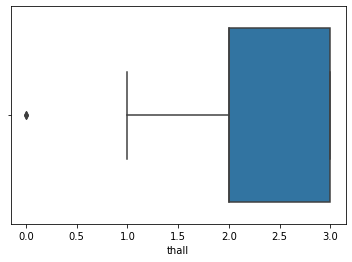

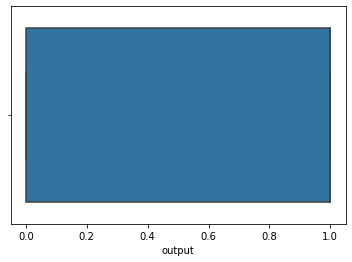

In [21]:
for feature in data:
    sns.boxplot(data[feature])
    plt.show()

NOTE : We find that some colums present outliers, but we are not removing the outliers since it is medical data it may consist important data

In [22]:
# Spliting the data into independent and dependent features

x=data.drop('output',axis=1)
y=data['output']

### Scaling the data using MinMax Scaler
  All the data values present in dataset will convert to between 0 to 1

In [23]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x[x.columns] = scalerX.fit_transform(x[x.columns])

In [24]:
# All the values are converted between 0 to 1
x.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [25]:
# seperate the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((212, 13), (91, 13))

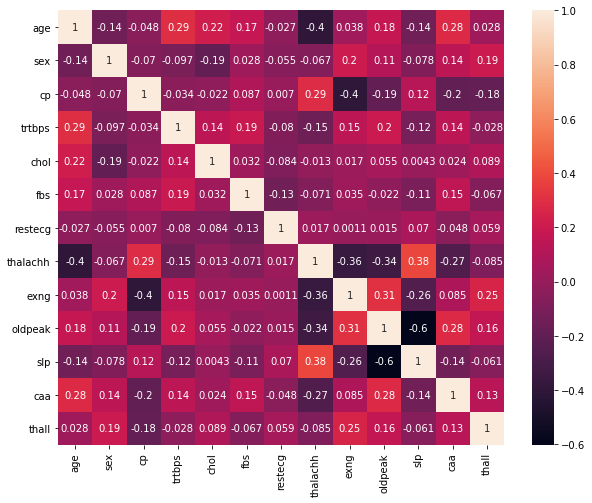

In [26]:
# lets see the correlation of features
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(),data=x,annot=True)
plt.show()

###  Let's create the models

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#ensemble Techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# finding the performance of the models
from sklearn.metrics import accuracy_score,confusion_matrix



In [28]:
key = ['LogisticRegression','SVC','DecisionTreeClassifier','KNeighborsClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value =[LogisticRegression(random_state=9),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),XGBClassifier()]
models = dict(zip(key,value))

In [29]:
predicted = []
for name , algorithm in models.items():
    model=algorithm
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    predicted.append(accu)
    print(name,"-"*10,accu)
    

LogisticRegression ---------- 0.7912087912087912
SVC ---------- 0.8241758241758241
DecisionTreeClassifier ---------- 0.7252747252747253
KNeighborsClassifier ---------- 0.8351648351648352
RandomForestClassifier ---------- 0.8241758241758241
GradientBoostingClassifier ---------- 0.8241758241758241
AdaBoostClassifier ---------- 0.7582417582417582
[02:58:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier ---------- 0.8021978021978022


LogisticRegression


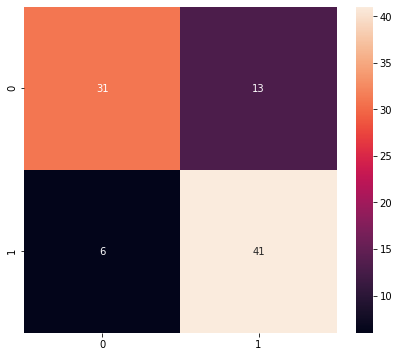

SVC


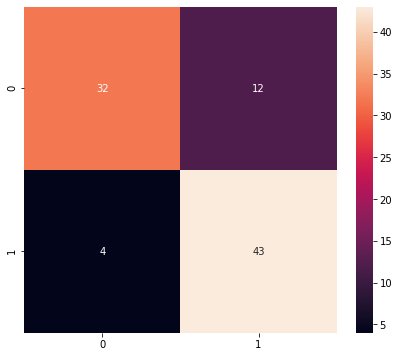

DecisionTreeClassifier


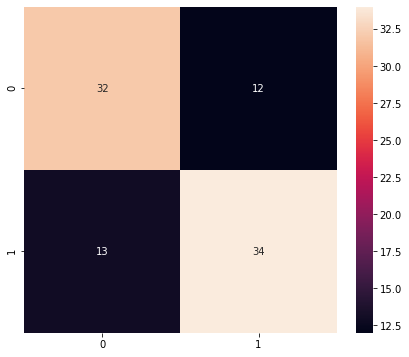

KNeighborsClassifier


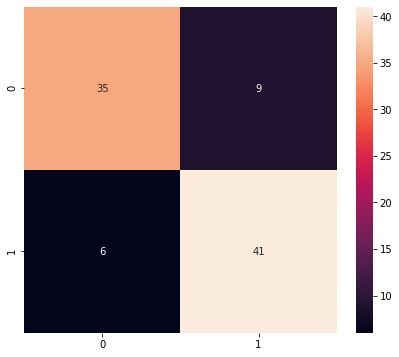

RandomForestClassifier


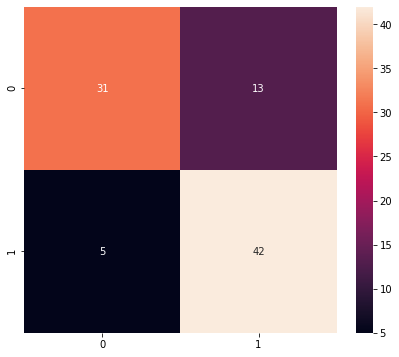

GradientBoostingClassifier


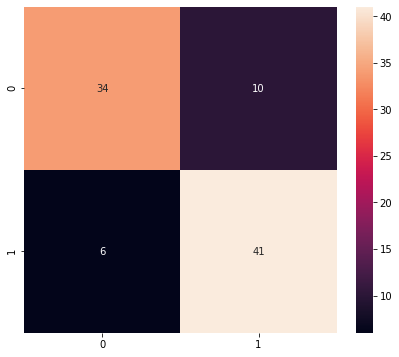

AdaBoostClassifier


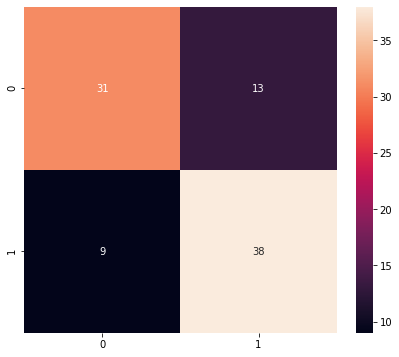

[02:58:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier


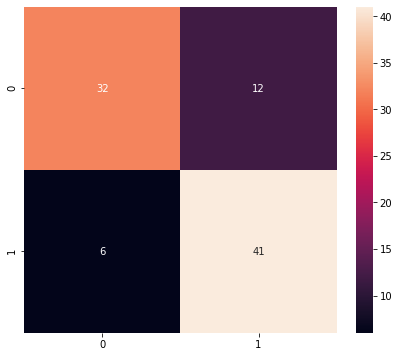

In [30]:
#confusion matrix
for name , algorithm in models.items():
    model=algorithm
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    cf = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(7,6))
    print(name)
    sns.heatmap(cf,annot=True,fmt='d')
    plt.show()


<AxesSubplot:>

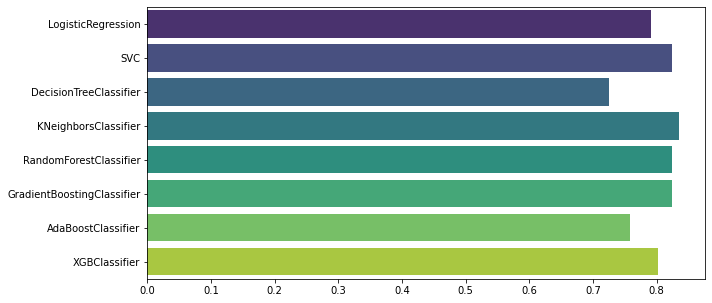

In [31]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='viridis')

## Conclusion 
From the above figure we can see that KNeighborsClassifier model give an accuracy greater than 83%.